# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

/home/xushuai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


E_val:0.11   lmbda:0.001
E_val:0.11   lmbda:0.01
E_val:0.11   lmbda:0.1
E_val:0.11   lmbda:0.0
E_val:0.105   lmbda:1.0
E_val:0.06   lmbda:10.0


LinAlgError: SVD did not converge

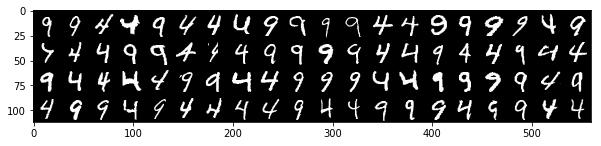

In [38]:
show_digit(X)
# Do feature normalization here
# begin answer
# axis 等于几，相当于对其哪一维度进行压缩
# 使用正则，那么必须先标准化
X = X - np.mean(X, axis=1).reshape(X.shape[0], -1)
X = X / np.std(X, axis=1).reshape(X.shape[0], -1)
# 解决std为0，出现nan的问题
where_are_nan = np.isnan(X)
where_are_inf = np.isinf(X)
X[where_are_nan] = 0
X[where_are_inf] = 0
N = X.shape[1]
# show_digit(X)
# end answer

# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
# lmbdas = np.array([0, 1])
lmbda = 0
E_val_min = float('inf')

from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.hstack((X[:, :j], X[:, j+1:]))  # take point j out of X
        y_ = np.hstack((y[0, :j], y[0, j+1:]))
        w = ridge(X_, y_, lmbdas[i])
        X_val = np.append(1, X[:, j])
        y_val = y[0, j]
        y_pre = np.sign(np.dot(w.T, X_val))
#         print('y_test:{},  y_pre:{}'.format(y_val, y_pre))
        E_val = E_val + 1*(y_val != y_pre)
    E_val = E_val / N;
    print('E_val:{}   lmbda:{}'.format(E_val, lmbdas[i]))
    # Update lmbda according validation error
    # begin answer
    #     Update lambda according validation error
    if E_val < E_val_min:
       lmbda = lmbdas[i]
       E_val_min = E_val
    # end answer

print('lambda chosen by LOOCV is {}'.format(lmbda))


In [106]:
from ridge import ridge
# Compute training error
w = ridge(X, y, lmbda)
w_2 = np.sqrt(np.dot(w.T, w))
w0 = ridge(X,y, 0)
w0_2 = np.sqrt(np.dot(w0.T, w0))

num_error = 0
num0_error = 0
X = np.vstack((np.ones((1, X.shape[1])), X))
for i in range(N):
    num_error += 1*(np.sign(np.dot(w.T, X[:, i])) != y[0, i])
    num0_error += 1*(np.sign(np.dot(w0.T, X[:, i])) != y[0, i])
E_train = num_error / N
E0_train = num0_error / N
print('E_train is {}\nE0_train is {}'.format(E_train, E0_train))
print('sum of wi^2 is {}\nsum of w0i^2 is {}'.format(w_2, w0_2))

/home/xushuai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


E_train is [0.]
E0_train is [0.]
sum of wi^2 is [[0.63789814]]
sum of w0i^2 is [[1.01018647]]


In [107]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']
# Do feature normalization to X_test, y_test
X_test = X_test - np.mean(X, axis=1).reshape(X_test.shape[0], -1)
X_test = X_test /  np.std(X, axis=1).reshape(X_test.shape[0], -1)
where_are_nan = np.isnan(X_test)
where_are_inf = np.isinf(X_test)
X_test[where_are_nan] = 0
X_test[where_are_inf] = 0
# Compute test error
num_error = 0
num0_error = 0
X_test = np.vstack((np.ones((1, X_test.shape[1])), X_test)) #这里X_test维度变了
for i in range(N):
    y_pre = np.sign(np.dot(w.T, X_test[:, i]))
    y_pre0 = np.sign(np.dot(w0.T, X_test[:, i]))
    num_error += 1*(y_pre != y_test[0, i])
    num0_error += 1*(y_pre0 != y_test[0, i])
#     print('y_pre:{}  y_pre0:{}  y_test:{}'.format(y_pre, y_pre0, y_test[0, i]))
E_test = num_error / N
E0_test = num0_error / N 
print('E_test is {}\nE0_test is {}'.format(E_test, E0_test))

E_test is [0.105]
E0_test is [0.12]


/home/xushuai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/xushuai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [4]:
from logistic_r import logistic_r
# axis 等于几，相当于对其哪一维度进行压缩
# 使用正则，那么必须先标准化
# X = X - np.mean(X, axis=1).reshape(X.shape[0], -1)
# X = X / np.std(X, axis=1).reshape(X.shape[0], -1)
# where_are_nan = np.isnan(X)
# where_are_inf = np.isinf(X)
# X[where_are_nan] = 0
# X[where_are_inf] = 0
# N = X.shape[1]

lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
E_val_min = float('inf')
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.hstack((X[:, :j], X[:, j+1:]))  # take point j out of X
        y_ = np.hstack((y[0, :j], y[0, j+1:]))
        w = logistic_r(X_, y_, lmbdas[i])
        X_val = np.append(1, X[:, j])
        y_val = y[0, j]
        y_pre = np.sign(np.dot(w.T, X_val))
        E_val = E_val + 1*(y_val != y_pre)
    E_val = E_val / N;
    # Update lmbda according validation error
    # begin answer
    print('E_val:{}   lmbda:{}'.format(E_val, lmbdas[i]))
    # Update lmbda according validation error
    # begin answer
    #     Update lambda according validation error
    if E_val < E_val_min:
       lmbda = lmbdas[i]
       E_val_min = E_val
    # end answer

print('lambda chosen by LOOCV is {}'.format(lmbda))
    # end answer
    

NameError: name 'lmbdas' is not defined

In [99]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']
# axis 等于几，相当于对其哪一维度进行压缩
# 使用正则，那么必须先标准化
# X = X - np.mean(X, axis=1).reshape(X.shape[0], -1)
# X = X / np.std(X, axis=1).reshape(X.shape[0], -1)
# where_are_nan = np.isnan(X)
# where_are_inf = np.isinf(X)
# X[where_are_nan] = 0
# X[where_are_inf] = 0
# N = X.shape[1]
# Compute training error
# Compute training error
from logistic_r import logistic_r
lmbda = 1e-1
w = logistic_r(X, y, lmbda)
w_2 = np.sqrt(np.sum(np.dot(w[1:].T, w[1:])))
w0 = logistic_r(X,y, 0)
w0_2 = np.sqrt(np.sum(np.dot(w0[1:].T, w0[1:])))

num_error = 0
num0_error = 0
X = np.vstack((np.ones((1, X.shape[1])), X))
for i in range(N):
    num_error += 1*(np.sign(np.dot(w.T, X[:, i])) != y[0, i])
    num0_error += 1*(np.sign(np.dot(w0.T, X[:, i])) != y[0, i])
E_train = num_error / N
E0_train = num0_error / N
print('E_train is {}\nE0_train is {}'.format(E_train, E0_train))
print('sum of wi^2 is {}\nsum of w0i^2 is {}'.format(w_2, w0_2))


/home/xushuai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/xushuai/pythonwork/ipynotebook/ml2018winter_hw2/regularization-cross-validation/logistic_r.py:18: RuntimeWarning: overflow encountered in exp
  return 1. / (1 + np.exp(-t))


E_train is [0.]
E0_train is [0.]
sum of wi^2 is 3.3030886449946966
sum of w0i^2 is 83.63259015568909


In [100]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']
# Do feature normalization to X_test, y_test
X_test = X_test - np.mean(X, axis=1).reshape(X_test.shape[0], -1)
X_test = X_test /  np.std(X, axis=1).reshape(X_test.shape[0], -1)
where_are_nan = np.isnan(X_test)
where_are_inf = np.isinf(X_test)
X_test[where_are_nan] = 0
X_test[where_are_inf] = 0
# Compute test error
num_error = 0
num0_error = 0
X_test = np.vstack((np.ones((1, X_test.shape[1])), X_test))
for i in range(N):
    y_pre = np.sign(np.dot(w.T, X_test[:, i]))
    y_pre0 = np.sign(np.dot(w0.T, X_test[:, i]))
    num_error += 1*(y_pre != y_test[0, i])
    num0_error += 1*(y_pre0 != y_test[0, i])
#     print('y_pre:{}  y_pre0:{}  y_test:{}'.format(y_pre, y_pre0, y_test[0, i]))
E_test = num_error / N
E0_test = num0_error / N 
print('E_test is {}\nE0_test is {}'.format(E_test, E0_test))

E_test is [0.095]
E0_test is [0.105]


/home/xushuai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/xushuai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
